In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input 
from keras import Model, layers
from keras.models import load_model, model_from_json

## Check Data Sample

Predators


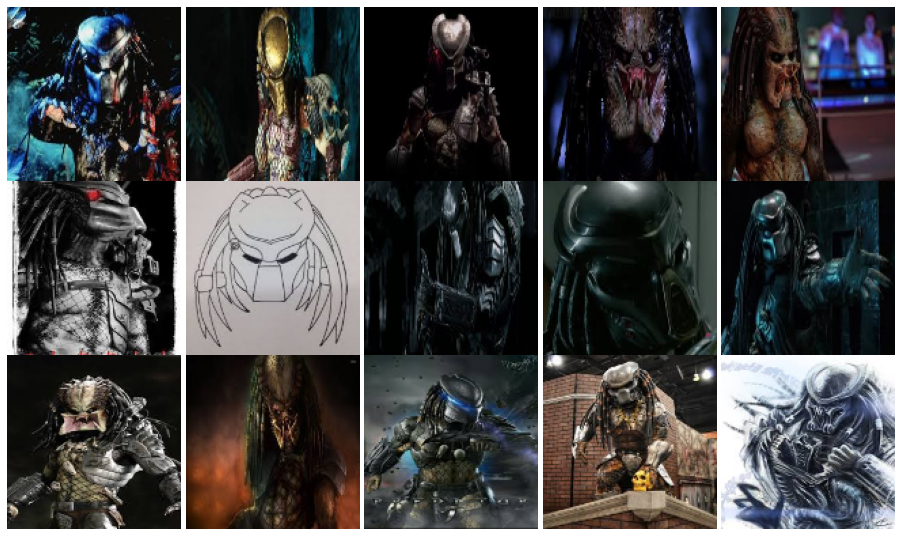

In [2]:
def plotImages(artist,directory):
    print(artist)
    multipleImages = glob(directory)
    plt.rcParams['figure.figsize'] = (16, 16)
    plt.subplots_adjust(wspace=0, hspace=0)
    i_ = 0
    for l in multipleImages[:15]:
        im = cv2.imread(l)
        im = cv2.resize(im, (128, 128)) 
        plt.subplot(5, 5, i_+1) #.set_title(l)
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
        i_ += 1
        
        
plotImages("Predators","data/train/predator/**") 

Aliens


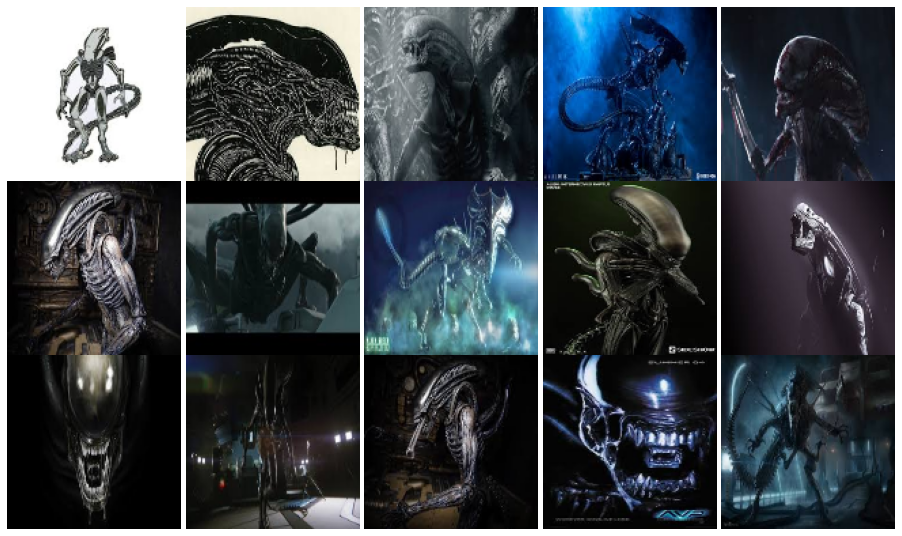

In [3]:
def plotImages(artist,directory):
    print(artist)
    multipleImages = glob(directory)
    plt.rcParams['figure.figsize'] = (16, 16)
    plt.subplots_adjust(wspace=0, hspace=0)
    i_ = 0
    for l in multipleImages[:15]:
        im = cv2.imread(l)
        im = cv2.resize(im, (128, 128)) 
        plt.subplot(5, 5, i_+1) #.set_title(l)
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
        i_ += 1
        
        
plotImages("Aliens","data/train/alien/**") 

In [4]:
input_path = "data/"

## Data Augmentation

In [5]:
train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    input_path + 'train',
    batch_size=32,
    class_mode='binary',
    target_size=(224,224))

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
    input_path + 'validation',
    shuffle=False,
    class_mode='binary',
    target_size=(224,224))

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [31]:
train_generator.next()

(array([[[[-8.09390030e+01, -1.02778999e+02, -1.12680000e+02],
          [-8.09390030e+01, -1.02778999e+02, -1.12680000e+02],
          [-8.09390030e+01, -1.02778999e+02, -1.12680000e+02],
          ...,
          [ 7.49554214e+01,  5.01154251e+01,  3.72144241e+01],
          [ 7.51853104e+01,  5.03453140e+01,  3.74443130e+01],
          [ 7.54151993e+01,  5.05752029e+01,  3.76742020e+01]],
 
         [[-7.78177185e+01, -9.96577148e+01, -1.09558716e+02],
          [-7.74345856e+01, -9.92745819e+01, -1.09175583e+02],
          [-7.70514450e+01, -9.88914413e+01, -1.08792442e+02],
          ...,
          [ 7.77377243e+01,  5.28977280e+01,  3.99967270e+01],
          [ 7.79675980e+01,  5.31276016e+01,  4.02266006e+01],
          [ 7.81974869e+01,  5.33574905e+01,  4.04564896e+01]],
 
         [[-7.26288834e+01, -9.44688797e+01, -1.04369881e+02],
          [-7.21691208e+01, -9.40091171e+01, -1.03910118e+02],
          [-7.17093506e+01, -9.35493469e+01, -1.03450348e+02],
          ...,
    

## Create Model

In [6]:
conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

In [7]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

## Fit Model

In [9]:
history = model.fit(train_generator,
         # steps_per_epoch=10, 
          steps_per_epoch=int(347/32),
          epochs=20,
          validation_data=validation_generator,
          validation_steps=int(100/32))

Epoch 1/20
10/10 [==============================] - 18s 2s/step - loss: 0.7888 - accuracy: 0.7219 - val_loss: 1.0263 - val_accuracy: 0.5625
Epoch 2/20
10/10 [==============================] - 15s 2s/step - loss: 0.2686 - accuracy: 0.8813 - val_loss: 0.1276 - val_accuracy: 0.9792
Epoch 3/20
10/10 [==============================] - 15s 2s/step - loss: 0.2073 - accuracy: 0.9156 - val_loss: 0.0374 - val_accuracy: 0.9896
Epoch 4/20
10/10 [==============================] - 15s 1s/step - loss: 0.1232 - accuracy: 0.9484 - val_loss: 0.3273 - val_accuracy: 0.8750
Epoch 5/20
10/10 [==============================] - 16s 2s/step - loss: 0.1254 - accuracy: 0.9500 - val_loss: 0.0732 - val_accuracy: 0.9792
Epoch 6/20
10/10 [==============================] - 16s 2s/step - loss: 0.0661 - accuracy: 0.9806 - val_loss: 0.1214 - val_accuracy: 0.9688
Epoch 7/20
10/10 [==============================] - 18s 2s/step - loss: 0.0649 - accuracy: 0.9719 - val_loss: 0.1136 - val_accuracy: 0.9688
Epoch 8/20
10/10 [==

In [10]:
model.evaluate(validation_generator)

7/7 [==============================] - 7s 982ms/step - loss: 0.1739 - accuracy: 0.9500


[0.1739051789045334, 0.949999988079071]

In [32]:
model.evaluate(train_generator)

22/22 [==============================] - 26s 1s/step - loss: 0.0140 - accuracy: 0.9971


[0.0140144731849432, 0.9971181750297546]

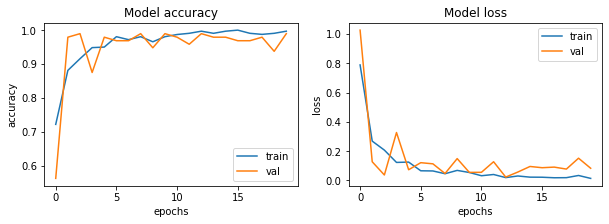

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val']) 

## Predictions

In [12]:
validation_img_paths = ["validation/alien/13.jpg",
                        "validation/alien/22.jpg",
                        "validation/predator/13.jpg",
                        "validation/predator/22.jpg"]
img_list = [Image.open(input_path + img_path) for img_path in validation_img_paths]

In [13]:
validation_batch = np.stack([preprocess_input(np.array(img.resize((224,224))))
                             for img in img_list])

In [14]:
pred_probs = model.predict(validation_batch)
pred_probs

array([[9.9999225e-01, 7.7717314e-06],
       [9.9783105e-01, 2.1689290e-03],
       [7.6741721e-03, 9.9232590e-01],
       [1.1503352e-06, 9.9999881e-01]], dtype=float32)

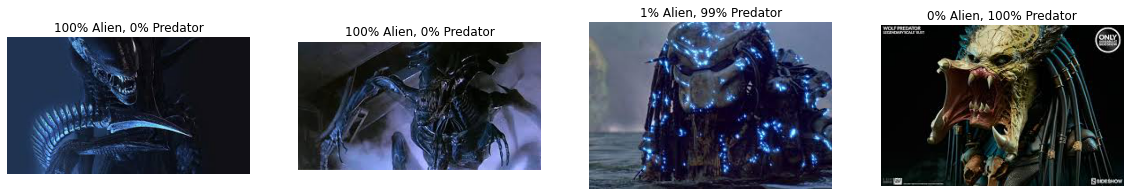

In [15]:
fig, axs = plt.subplots(1, len(img_list), figsize=(20, 5))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% Alien, {:.0f}% Predator".format(100*pred_probs[i,0],
                                                            100*pred_probs[i,1]))
    ax.imshow(img)

## Just for fun

In [16]:
validation_img_paths = [ "fun/6.jpg",
                        "fun/100.jpg"]
img_list = [Image.open(input_path + img_path) for img_path in validation_img_paths]

In [17]:
validation_batch = np.stack([preprocess_input(np.array(img.resize((224,224))))
                             for img in img_list])

In [18]:
pred_probs = model.predict(validation_batch)
pred_probs

array([[1.2713487e-02, 9.8728651e-01],
       [4.1462677e-05, 9.9995852e-01]], dtype=float32)

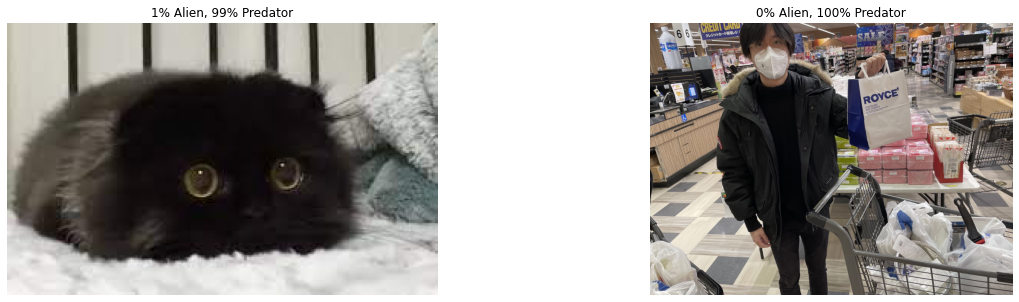

In [19]:
fig, axs = plt.subplots(1, len(img_list), figsize=(20, 5))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% Alien, {:.0f}% Predator".format(100*pred_probs[i,0],
                                                            100*pred_probs[i,1]))
    ax.imshow(img)